**Capstone Assignment 20.1:** Initial Report and Exploratory Data Analysis (EDA)

of the : **Research Question identified in Module 16**
“How do socio-economic and geographic factors influence housing prices in California, and can machine learning models accurately predict housing prices based on these features?”


In [3]:
#Add libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:

# Load the dataset provided in Module 16 submission of Capstone
df = pd.read_csv('sample_data/housing.csv')

# Step 1: Handle missing values: Identify and address missing values
# using imputation or removal.

# Identify missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Drop rows with any missing values
df_cleaned = df.dropna()

print("\nMissing values after handling:")
display(df_cleaned.isnull().sum())

# Display the shape of the data before and after dropping missing values
print("\nShape before dropping missing values:", df.shape)
print("Shape after dropping missing values:", df_cleaned.shape)

# Step 2: Handle duplicates: Check for and remove duplicate rows.
print("\nShape before dropping duplicates:", df_cleaned.shape)
df_cleaned = df_cleaned.drop_duplicates()
print("Shape after dropping duplicates:", df_cleaned.shape)

Missing values before handling:


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0



Missing values after handling:


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0



Shape before dropping missing values: (20640, 10)
Shape after dropping missing values: (20433, 10)

Shape before dropping duplicates: (20433, 10)
Shape after dropping duplicates: (20433, 10)


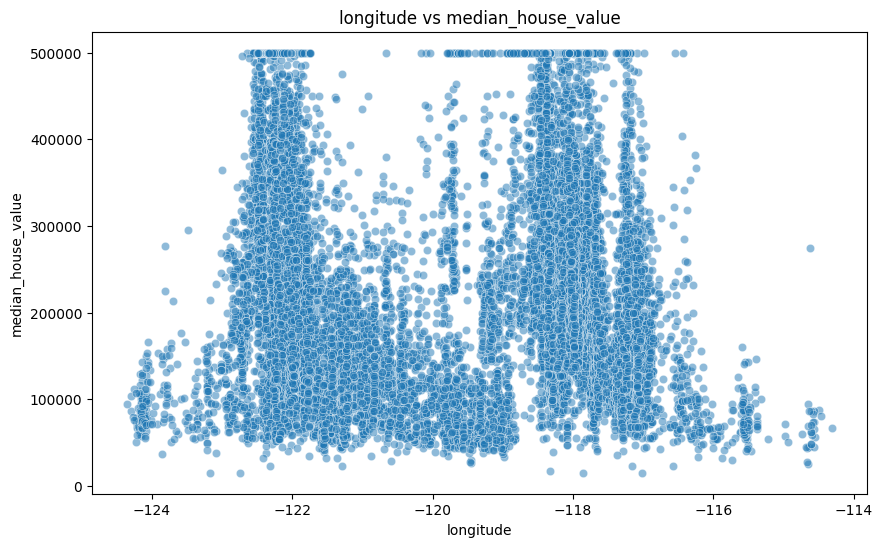

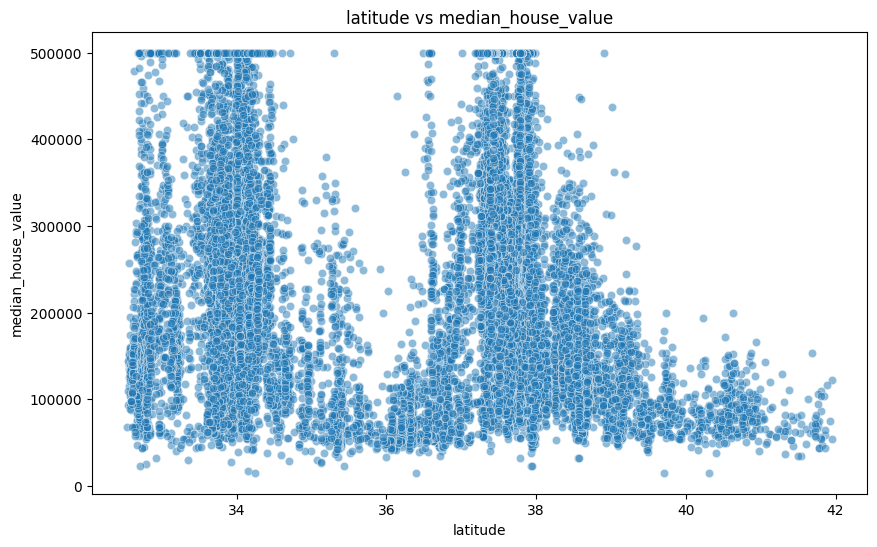

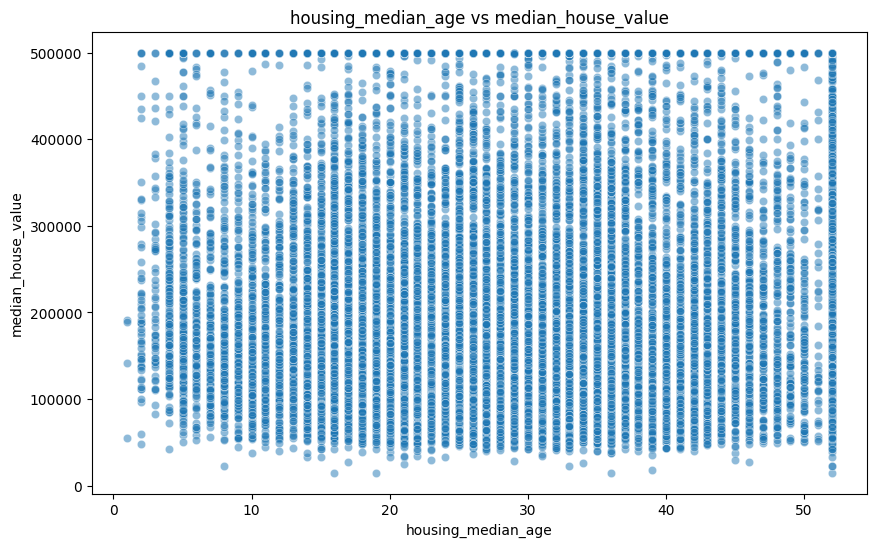

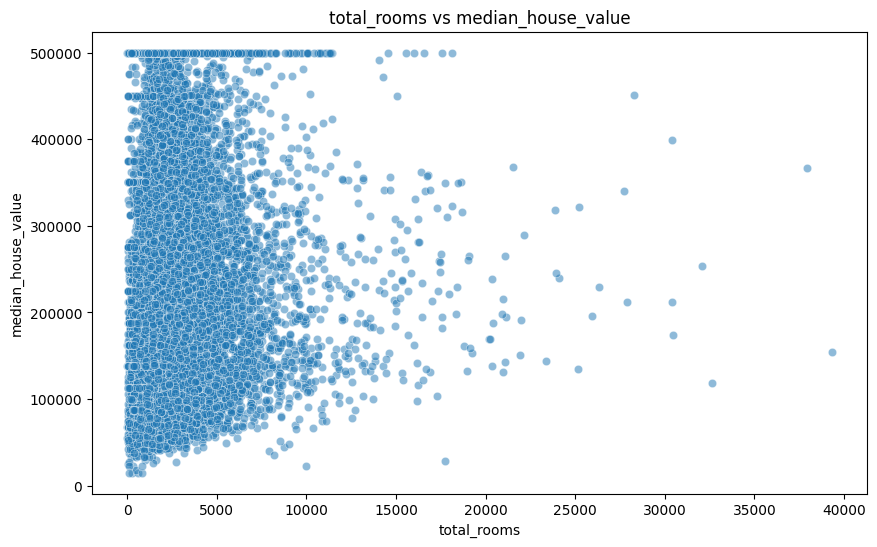

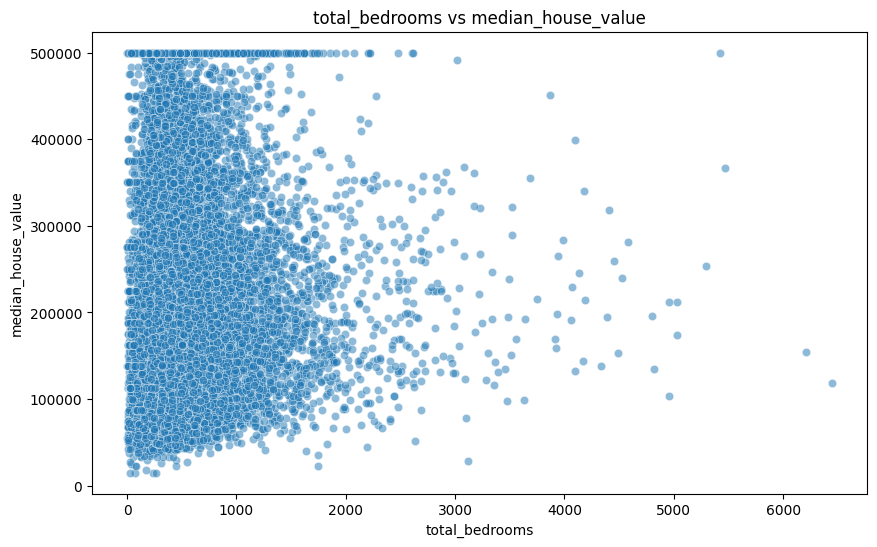

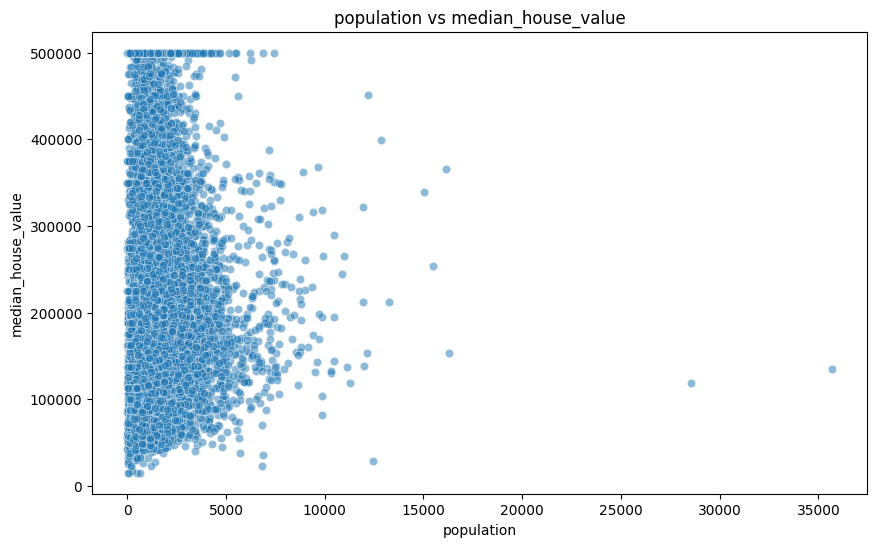

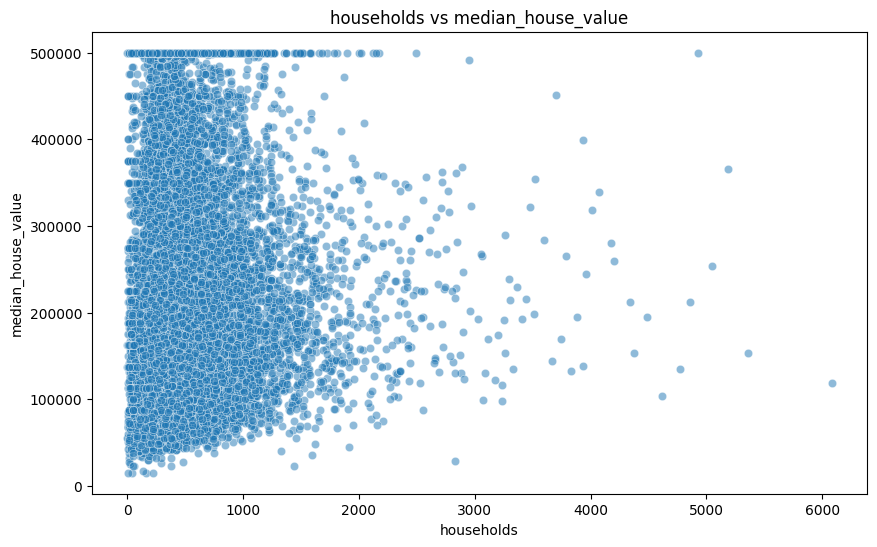

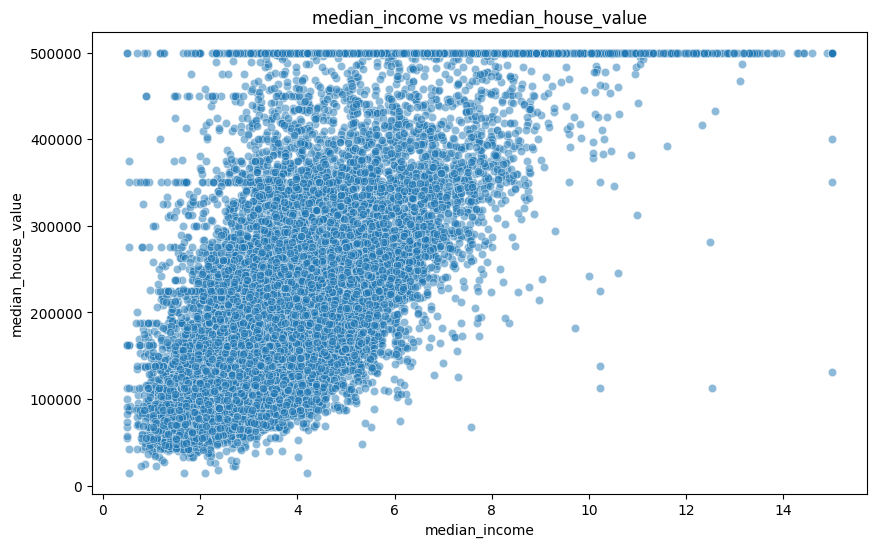

In [8]:
#Step 3:Identify and analyze outliers in the dataset.
#'median_house_value' is the dependent variable (price) and all other columns are
# indepdendent variaobles. To identify and remove outliers, use scatter graphs
# to visualize the relationship between the numeric independent variables, and
# the target variable 'median_house_value'
dependent_variable = 'median_house_value'
independent_variables = df_cleaned.select_dtypes(include=['number']).columns.tolist()
independent_variables.remove(dependent_variable) # Remove the dependent variable from the list

# First plot independent variables against the dependent/target variable
# to visualize the outliers.
for col in independent_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=col, y=dependent_variable, alpha=0.5)
    plt.title(f'{col} vs {dependent_variable}')
    plt.xlabel(col)
    plt.ylabel(dependent_variable)
    plt.show()

In [11]:
# Now remove the outliers from the dataset

# Identify numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()

# Remove outliers using Interquartile Range (IQR)
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of data before removing outliers:", df_cleaned.shape)
print("Shape of data after removing outliers:", df_no_outliers.shape)


Shape of data before removing outliers: (20433, 10)
Shape of data after removing outliers: (17434, 10)


In [12]:
# Step 4: Feature Engineering

# Step 4.1: One-hot encode categorical features (assuming 'ocean_proximity' is the categorical column)
df_encoded = pd.get_dummies(df_no_outliers, columns=['ocean_proximity'], drop_first=True)

# Step 4.2: Create new features (examples: rooms per household, rooms that are bedroom, population per household)
df_engineered = df_encoded.copy()
df_engineered['rooms_per_household'] = df_engineered['total_rooms'] / df_engineered['households']
df_engineered['rooms_that_are_bedrooms'] = df_engineered['total_bedrooms'] / df_engineered['total_rooms']
df_engineered['population_per_household'] = df_engineered['population'] / df_engineered['households']

print("Shape of data after feature engineering:", df_engineered.shape)
display(df_engineered.head())

Shape of data after feature engineering: (17434, 16)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,rooms_that_are_bedrooms,population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False,4.931907,0.192899,2.128405


## Summary of Data Cleaning and Feature Engineering Steps:

1.  **Handle Missing Values**: We identified and removed rows with missing values from the dataset.
2.  **Handle Duplicates**: We checked for and removed any duplicate rows.
3.  **Outlier Analysis**: We identified and removed outliers from the numerical columns using the IQR method.
4.  **Feature Engineering**:
    *   We performed one-hot encoding on the 'ocean\_proximity' categorical column.
    *   We created new features: 'rooms\_per\_household', 'bedrooms\_per\_room', and 'population\_per\_household'.

The resulting DataFrame `df_engineered` now contains the cleaned data with new engineered features.

In [13]:
display(df_engineered.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,rooms_that_are_bedrooms,population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False,4.931907,0.192899,2.128405


# Define a Model
Use the Engineering Dataframe from the last step of Data Analysis step.
Then, split the data into training and testing sets, select a baseline regression model, train it on the training data, evaluate its performance on the testing data using an appropriate metric, interpret the metric, and provide a rationale for its use.
Finally, display the code for plotting all independent variables against the dependent variable 'price' after removing duplicates and outliers from numerical columns.

## Split data

Split the engineered data into training and testing sets.


In [14]:
#use df_engineered datafram that has cleaned up and engineered features
# to build the model. Start by splitting the data into test and train.

X = df_engineered.drop('median_house_value', axis=1)
y = df_engineered['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13947, 15)
Shape of X_test: (3487, 15)
Shape of y_train: (13947,)
Shape of y_test: (3487,)


## Select baseline model
Choose a suitable baseline regression model . We will choose Linear Regression.


In [15]:
#create an instance (an object) of the LinearRegression class
# from the sklearn.linear_model
baseline_model = LinearRegression()

## Train model
Train the baseline Linear Regression model using the training data.


In [16]:
#train the data using Linear Regression Model
baseline_model.fit(X_train, y_train)

LinearRegression()

## Evaluate model
Predict on the test data set and evaluate the model using appropriate regression metric. We will choose Mean Squared Error (MSE), Root Mean Squared error (RMSE) , and R-Squared Metrics.


In [17]:
# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3213623454.581111
Root Mean Squared Error (RMSE): 56688.830068904324
R-squared (R2): 0.631067570857748


**Reasoning**:
Let us interpret the calculated evaluation metrics and provide a rationale for using them.

**Interpretation:**

**MSE**  represents the average squared difference between the actual and predicted housing values. A lower MSE indicates a better fit of the model to the data. The value of 3213623454.58 means, on average, the squared difference between the actual and predicted house prices is this amount.

**RMSE**  is the square root of the MSE and is in the same units as the target variable (median_house_value). It provides a more interpretable measure of the average prediction error. An RMSE of 56688.83 means that, on average, the model's predictions are off by approximately $56688.83.

**R-squared (R2)**  measures the proportion of the variance in the dependent variable (median_house_value) that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. An R2 score of 0.6311 suggests that approximately 63.11% of the variance in median house values can be explained by the model.

**Rationale for using these metrics:**

MSE and RMSE are commonly used to evaluate regression models because they quantify the average prediction error. RMSE is particularly useful as it is in the same units as the target variable, making it easier to understand the magnitude of the error.

R-squared is used to assess how well the independent variables explain the variance in the dependent variable. It provides a measure of the goodness of fit of the model.


**Now identify which independent variables influence Median Price more than other variables**

Here are the key points to be considered:

1. Based on the Linear Regression model we trained, we will look at the coefficients assigned to each independent variable to understand their impact on the median_house_value.
2. A larger absolute value of a coefficient indicates a stronger influence on the target variable, assuming the features are on a similar scale



In [18]:

# Get the coefficients of the trained model
coefficients = baseline_model.coef_

# Get the names of the independent variables
feature_names = X_train.columns

# Create a pandas Series to easily view coefficients with their corresponding feature names
coef_series = pd.Series(coefficients, index=feature_names)

# Sort the coefficients by their absolute values to see which have the largest impact
sorted_coef = coef_series.abs().sort_values(ascending=False)

print("Coefficients of the Linear Regression Model (sorted by absolute value):")
display(sorted_coef)

Coefficients of the Linear Regression Model (sorted by absolute value):


,0
rooms_that_are_bedrooms,219836.297173
ocean_proximity_ISLAND,183448.411269
median_income,41480.837836
ocean_proximity_INLAND,33118.607882
longitude,25005.717699
latitude,23540.128777
ocean_proximity_NEAR BAY,9656.659429
ocean_proximity_NEAR OCEAN,2409.694221
rooms_per_household,1783.041767
population_per_household,1420.868939


**Analyzing the Coffecients**


Based on the to cofficient values, Number of Bedrooms, Ocean proximity , location and income have the strongest influence on housing prices in California.

**Please note:**

 In Linear Regression Model the magnitude of the coefficients can also be influenced by the scale of the features. However, it provides a good indication of which variables have a stronger linear relationship with the housing price in this dataset.

## Summary:

### Data Analysis Key Findings

*   The engineered data was successfully split into training (80%) and testing (20%) sets, with shapes (13947, 15) for features and (13947,) for the target variable in the training set, and (3487, 15) and (3487,) respectively for the testing set.
*   A Linear Regression model was selected and instantiated as the baseline model.
*   The baseline Linear Regression model was successfully trained on the training data.
*   The model's performance on the testing data was evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).
*   The calculated evaluation metrics are: MSE of approximately 3,213,623,454.58, RMSE of approximately 56,688.83, and R2 of approximately 0.6311.
*   The RMSE of \$56,688.83 indicates that, on average, the model's predictions for median house values are off by this amount.
*   The R2 score of 0.6311 suggests that approximately 63.11% of the variance in median house values can be explained by the independent variables in the model.
*   MSE and RMSE are suitable for quantifying prediction errors in regression, with RMSE being more interpretable as it's in the target variable's units. R-squared is appropriate for assessing the proportion of variance explained by the model.
*   Based on the coefficients of the Linear Regression model, the variables with the largest absolute values, and thus the strongest estimated influence on median house value in this linear model, are 'rooms\_that\_are\_bedrooms', 'ocean\_proximity\_ISLAND', 'median\_income', 'ocean\_proximity\_INLAND', 'longitude', and 'latitude'.

### Insights or Next Steps

*   The baseline Linear Regression model explains a moderate amount of variance in housing prices (63.11%), but the average prediction error (RMSE) of approximately \$56,688.83 suggests there is room for improvement.
*   The analysis of coefficients indicates which features have the most significant linear impact on predicted housing prices according to this model.
*   Future steps could involve exploring more complex regression models, performing further feature engineering (perhaps focusing on interactions between the most influential features), or hyperparameter tuning to potentially reduce the prediction error and increase the R-squared value. We could also investigate the relationships between the top influencing variables and the target variable further.